# Cloning yolov5 github repository and installing the dependencies

In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 2023-3-27 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.6/78.2 GB disk)


# Accessing roboflow's API to access our custom dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("wobot-vhq0c").project("document-classification-er1r7")
dataset = project.version(1).download("yolov5")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Document-classification-1 in yolov5pytorch:: 100%|██████████| 2264/2264 [00:01<00:00, 1300.43it/s]


# Training our model for 150 epochs

In [ ]:
!python train.py --img 640 --batch 32 --epochs 150 --data /content/yolov5/Document-classification/data.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/Document-classification/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-129-gb54fd0a Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0

# Loading custom trained model and displaying the detections

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-129-gb54fd0a Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


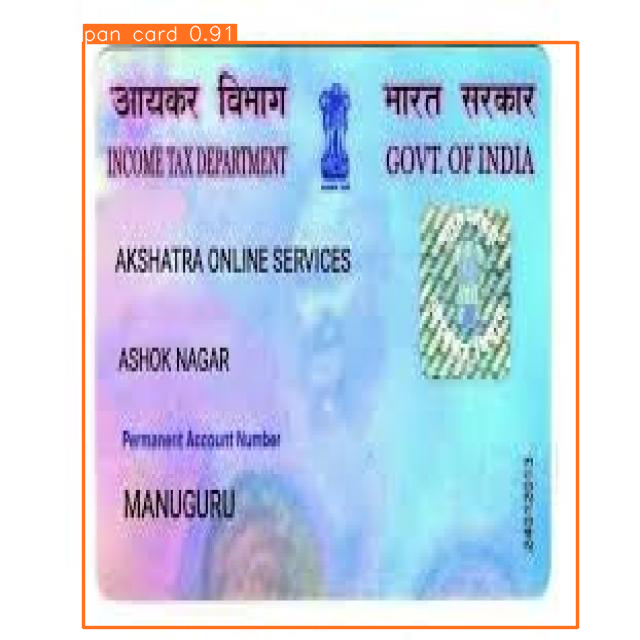

In [ ]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'custom', path = '/content/yolov5/runs/train/exp2/weights/best.pt', force_reload = True)
im = '/content/yolov5/Document-classification/test/images/images-52-_jpg.rf.e7d5581f62ceb28e4c18d25b5040c080.jpg'
results = model(im)  # inference
results.show()  # or .show(), .save(), .crop(), .pandas(), etc.

In [ ]:
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 640x640 1 pan card
Speed: 8.9ms pre-process, 12.9ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)

In [ ]:
img = cv2.imread(im)
img = cv2.resize(img, (640,640))

In [ ]:
model(img)

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 640x640 1 driving license
Speed: 3.1ms pre-process, 13.1ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)

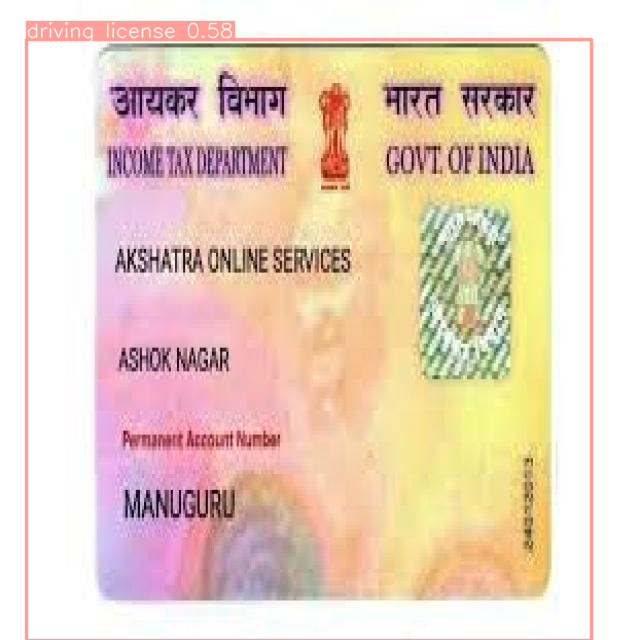

In [ ]:
results = model(img)  # inference
results.show()

# inferencing on test images

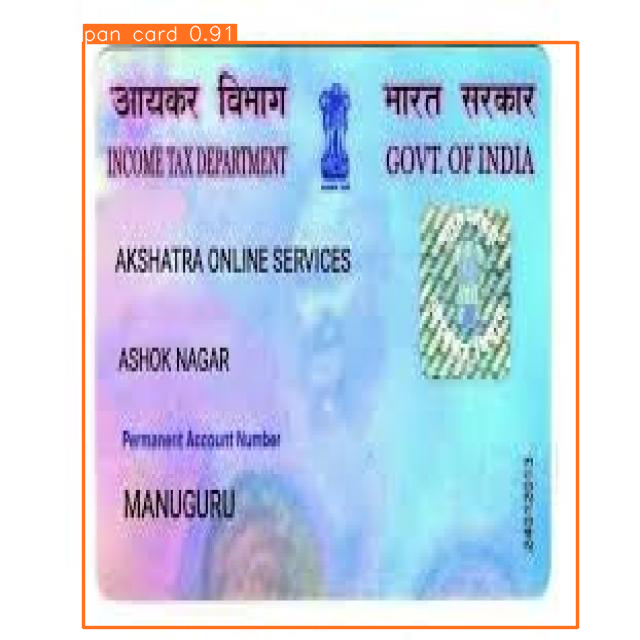

In [ ]:
results = model(im)  # inference
results.show() 

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-3-27 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients
Adding AutoShape... 


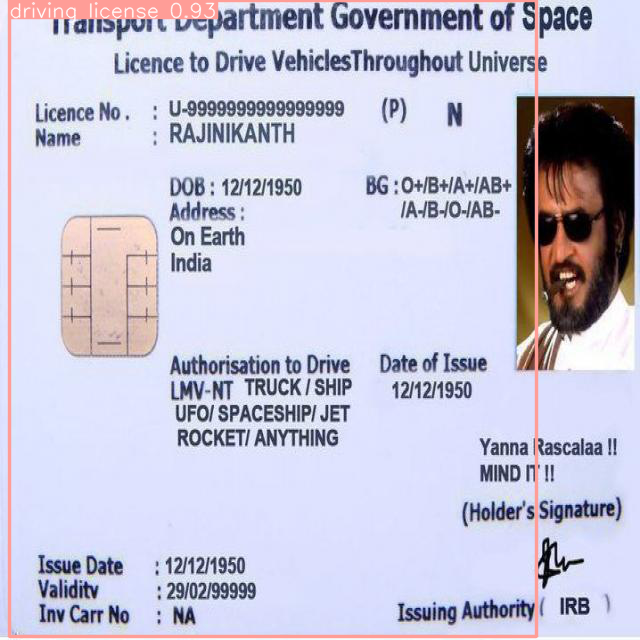

In [3]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'custom', path = '/content/150-epochs-best.pt', force_reload = True)
im = '/content/620f12ddd782c1f84ef09660e8f80ebd_jpg.rf.27fc7b4f326819de09aa79f8afa827f6.jpg'
results = model(im)  # inference
results.show() 

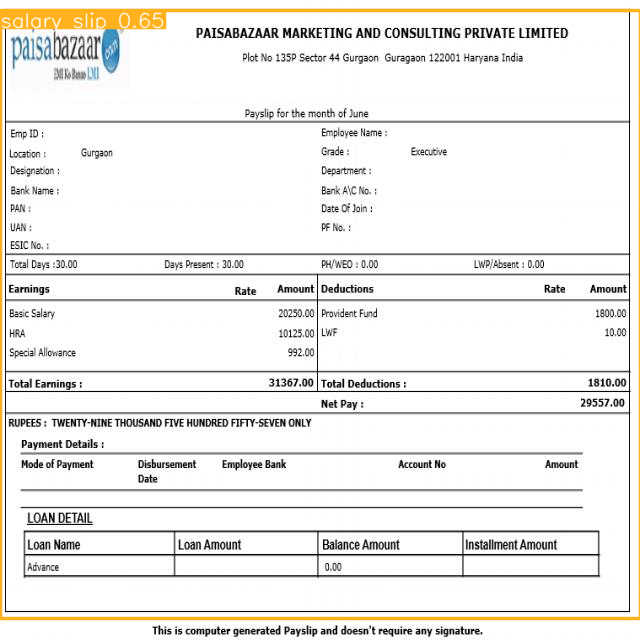

In [4]:
im = '/content/Salary-Slip-Sample_png.rf.5fa5c61e47df2757fefecd9597a22172.jpg'
results = model(im)  # inference
results.show() 

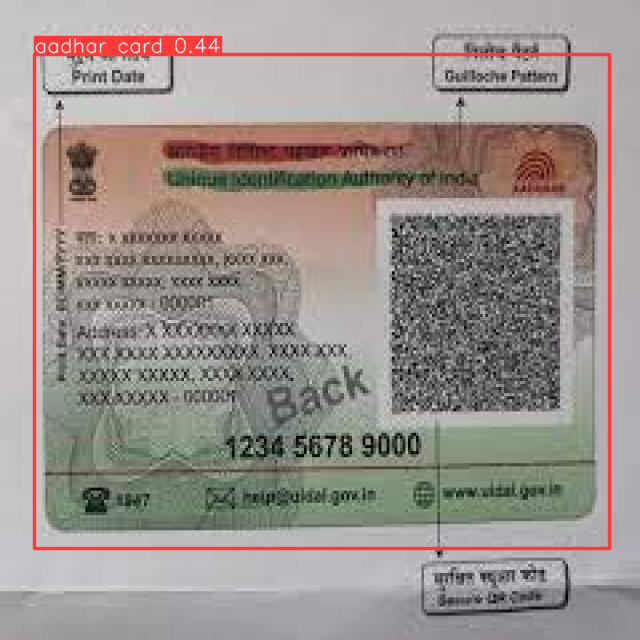

In [6]:
im = '/content/download-1-_jpg.rf.2ec53dbffafbe82f6985c4acfb742c62.jpg'
results = model(im)  # inference
results.show() 